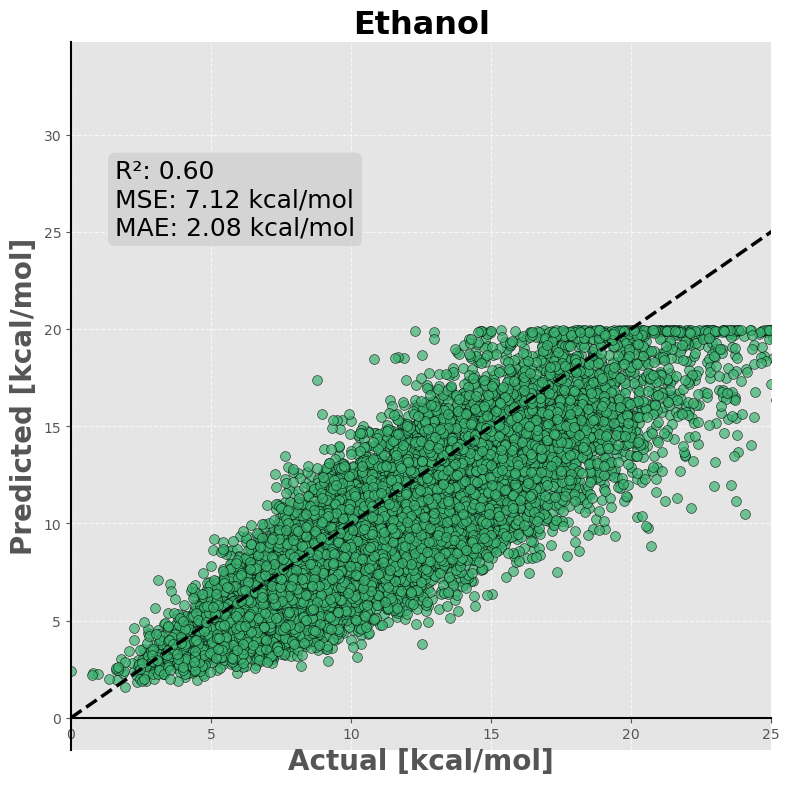

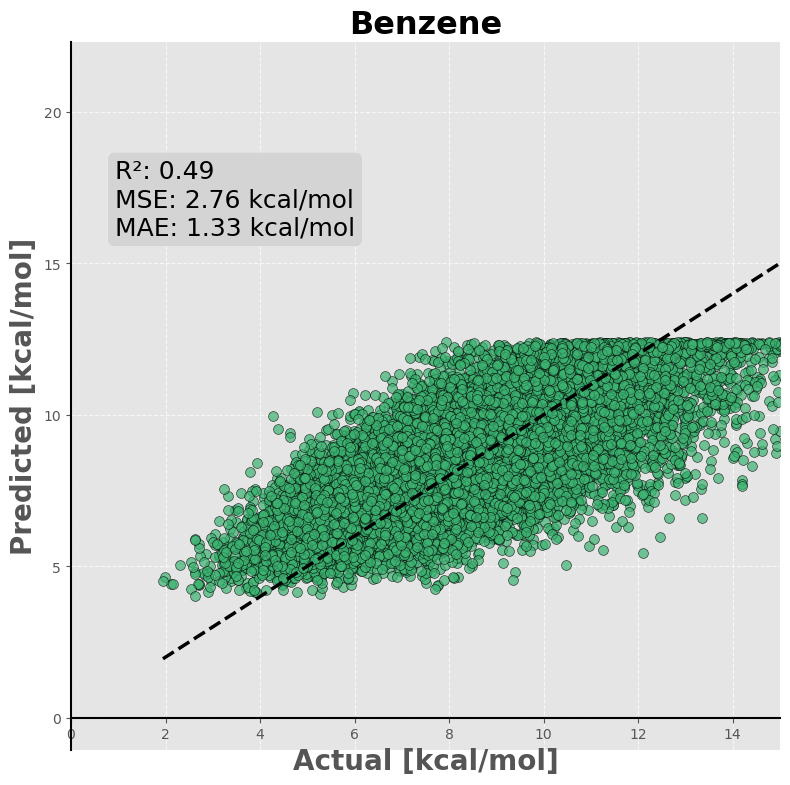

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


def plot_regression_results(actual, predicted, title, xlim=None):
    # Calculate error metrics
    mse = mean_squared_error(actual, predicted)
    mae = mean_absolute_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    # Set a nicer style
    plt.style.use("ggplot")

    # Create scatter plot
    plt.figure(figsize=(8, 8))  # Larger plot for better readability
    plt.scatter(
        actual,
        predicted,
        edgecolors="k",
        s=50,
        alpha=0.7,
        label="Predictions",
        c="mediumseagreen",
    )  # Adjusted transparency and color
    plt.plot(
        [min(actual), max(actual)], [min(actual), max(actual)], "k--", linewidth=2.5
    )  # Thicker line for ideal fit
    plt.xlabel("Actual [kcal/mol]", fontsize=20, fontweight="bold")
    plt.ylabel("Predicted [kcal/mol]", fontsize=20, fontweight="bold")
    plt.title(title, fontsize=23, fontweight="bold")

    # Set x-axis limits if provided
    if xlim:
        plt.xlim(xlim)

    # Add text box for error metrics
    textstr = f"R²: {r2:.2f}\nMSE: {mse:.2f} kcal/mol\nMAE: {mae:.2f} kcal/mol"
    props = dict(boxstyle="round", facecolor="lightgrey", alpha=0.9)
    plt.gcf().text(0.15, 0.7, textstr, fontsize=18, bbox=props)

    # Improve plot aesthetics
    plt.grid(True, linestyle="--", alpha=0.7)
    plt.xticks(fontsize=28, fontweight="bold")
    plt.yticks(fontsize=28, fontweight="bold")

    # Add axis lines and ticks
    plt.axhline(y=0, color="k", linewidth=0.5)
    plt.axvline(x=0, color="k", linewidth=0.5)

    plt.gca().spines["left"].set_position("zero")
    plt.gca().spines["bottom"].set_position("zero")
    plt.gca().spines["left"].set_color("black")
    plt.gca().spines["bottom"].set_color("black")
    plt.gca().spines["left"].set_linewidth(1.5)
    plt.gca().spines["bottom"].set_linewidth(1.5)
    plt.gca().spines["right"].set_color("none")
    plt.gca().spines["top"].set_color("none")

    plt.gca().xaxis.set_ticks_position("bottom")
    plt.gca().yaxis.set_ticks_position("left")

    plt.tight_layout()
    # Save plot
    plt.savefig(f"./data/{title}_regression_plot.png", dpi=600)

    # Show plot
    plt.show()


# Read the data
ethanol_data = pd.read_csv("./data/ethanol_cMBDF_regression_predictions.txt")
benzene_data = pd.read_csv("./data/benzene2017_cMBDF_regression_predictions.txt")

# Extract actual and predicted values
ethanol_actual = ethanol_data["Actual"].values
ethanol_predicted = ethanol_data[" Predicted"].values
benzene_actual = benzene_data["Actual"].values
benzene_predicted = benzene_data[" Predicted"].values

# Plot the results for ethanol with xlim set
plot_regression_results(ethanol_actual, ethanol_predicted, "Ethanol", xlim=(0, 25))

# Plot the results for benzene with xlim set
plot_regression_results(benzene_actual, benzene_predicted, "Benzene", xlim=(0, 15))

In [ ]:
benzene_data.keys()